# 1. For Chromagram

### Installing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier

### Reading Data

In [9]:
chroma = pd.read_csv(r"data\chromagram.csv")
chroma.head()

,C (C# / Db),C# (D♭ / B♭),D,D# (E♭),E,F,F# (G♭),G,G# (A♭),A,A# (B♭),B,Genre
0,0.363934,0.210595,0.228163,0.630021,1.000000,0.936838,0.622386,0.656197,0.770327,0.638823,0.480746,0.483903,Pop
1,0.463867,0.811010,0.501662,0.569125,0.700595,1.000000,0.805109,0.582971,0.948419,0.934804,0.841336,0.584974,Pop
2,0.406813,1.000000,0.473217,0.462457,0.268383,0.252549,0.479781,0.402129,0.377478,0.531163,0.760763,0.291625,Pop
3,0.335539,1.000000,0.391137,0.478910,0.194736,0.135036,0.431765,0.326971,0.189751,0.287179,0.596291,0.136635,Pop
4,0.293878,0.978613,0.573593,0.847509,0.304158,0.194047,0.597830,0.305963,0.185818,0.324381,1.000000,0.233187,Pop


In [10]:
chroma['Genre'].value_counts()

Genre
Romance    11643
Jazz       10431
Pop         8150
Hip Hop     7625
Rock        1817
Funk         883
Name: count, dtype: int64

In [11]:
chroma.describe()

,C (C# / Db),C# (D♭ / B♭),D,D# (E♭),E,F,F# (G♭),G,G# (A♭),A,A# (B♭),B
count,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000
mean,0.339049,0.329334,0.361748,0.434046,0.434313,0.381911,0.402291,0.380641,0.372245,0.394280,0.378957,0.377777
std,0.303264,0.293018,0.302964,0.334242,0.336533,0.314047,0.329266,0.315211,0.327415,0.345977,0.308484,0.313152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082504,0.076167,0.096202,0.126198,0.128493,0.114088,0.109492,0.105843,0.088670,0.086499,0.118399,0.104621
50%,0.242853,0.240163,0.280457,0.365755,0.362758,0.297129,0.309325,0.293064,0.261422,0.282590,0.286671,0.294024
75%,0.533519,0.531309,0.569187,0.716946,0.717733,0.599748,0.667785,0.623303,0.620111,0.675486,0.598015,0.598834
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Classifying label as simple integers rather than one-hot-encoding, as it is a multiclass-multioutput problem where OneHotEncoder will not be able to deliver the desired value

In [13]:
chroma.drop('Genre', axis = 1, inplace = True)

In [12]:
arr = []
for i in range(len(chroma['Genre'])):
    if chroma['Genre'][i]=='Funk':
        arr.append(1)
    elif chroma['Genre'][i]=='Rock':
        arr.append(2)
    elif chroma['Genre'][i]=='Hip Hop':
        arr.append(3)
    elif chroma['Genre'][i]=='Pop':
        arr.append(4)
    elif chroma['Genre'][i]=='Jazz':
        arr.append(5)
    elif chroma['Genre'][i]=='Romance':
        arr.append(6)

target_df = pd.DataFrame(arr, columns=['Genre'])
target_df

,Genre
0,4
1,4
2,4
3,4
4,4
...,...
40544,1
40545,1
40546,1
40547,1


### A depiction of how standard scaling can be done. We tried and tested it, but the accuracy was slightly lesser, so we abandoned the idea

In [7]:
ss = StandardScaler()
chroma_scaled = ss.fit_transform(chroma.iloc[:,:12])
chroma_scaled_df = pd.DataFrame(chroma_scaled, columns = chroma.iloc[:,:12].columns)
chroma_scaled_df

,C (C# / Db),C# (D♭ / B♭),D,D# (E♭),E,F,F# (G♭),G,G# (A♭),A,A# (B♭),B
0,0.082056,-0.405233,-0.440931,0.586334,1.680946,1.767039,0.668450,0.874204,1.215846,0.706829,0.329970,0.338898
1,0.411586,1.643863,0.461825,0.404141,0.791260,1.968164,1.223396,0.641894,1.759787,1.562332,1.498895,0.661656
2,0.223450,2.288849,0.367934,0.085004,-0.493064,-0.411926,0.235346,0.068171,0.015983,0.395648,1.237699,-0.275117
3,-0.011576,2.288849,0.097006,0.134230,-0.711906,-0.786117,0.089516,-0.170270,-0.557385,-0.309564,0.704531,-0.770060
4,-0.148952,2.215860,0.699252,1.237032,-0.386756,-0.598210,0.593871,-0.236918,-0.569398,-0.202035,2.013235,-0.461733
...,...,...,...,...,...,...,...,...,...,...,...,...
40544,0.368413,-0.585591,-0.782835,-0.373406,0.867519,0.823000,0.307744,1.908859,1.917328,1.293481,-0.258644,-0.533455
40545,0.159336,-0.633644,-0.994377,-1.074692,-0.722699,-0.751853,-0.801988,-0.183720,-0.105993,1.275144,2.013235,0.156941
40546,0.056021,-0.640242,-1.008080,-1.188833,-1.107601,-0.982127,-1.003980,-0.870355,-0.885008,-0.656497,2.013235,1.527929
40547,0.067039,-0.508373,-0.898077,-1.164959,-1.132446,-1.013394,-1.029994,-0.873954,-0.606679,-0.904614,0.790692,1.986993


### Chromagram data ready 

In [15]:
chroma_final = pd.concat([chroma, target_df], axis =1)
chroma_final

,C (C# / Db),C# (D♭ / B♭),D,D# (E♭),E,F,F# (G♭),G,G# (A♭),A,A# (B♭),B,Genre
0,0.363934,0.210595,0.228163,0.630021,1.000000,0.936838,0.622386,0.656197,0.770327,0.638823,0.480746,0.483903,4
1,0.463867,0.811010,0.501662,0.569125,0.700595,1.000000,0.805109,0.582971,0.948419,0.934804,0.841336,0.584974,4
2,0.406813,1.000000,0.473217,0.462457,0.268383,0.252549,0.479781,0.402129,0.377478,0.531163,0.760763,0.291625,4
3,0.335539,1.000000,0.391137,0.478910,0.194736,0.135036,0.431765,0.326971,0.189751,0.287179,0.596291,0.136635,4
4,0.293878,0.978613,0.573593,0.847509,0.304158,0.194047,0.597830,0.305963,0.185818,0.324381,1.000000,0.233187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40544,0.450775,0.157748,0.124580,0.309239,0.726258,0.640369,0.503619,0.982327,1.000000,0.841789,0.299171,0.210727,1
40545,0.387370,0.143668,0.060491,0.074842,0.191104,0.145797,0.138226,0.322731,0.337542,0.835445,1.000000,0.426923,1
40546,0.356038,0.141734,0.056340,0.036692,0.061573,0.073481,0.071718,0.106300,0.082484,0.167150,1.000000,0.856245,1
40547,0.359380,0.180374,0.089666,0.044672,0.053212,0.063662,0.063153,0.105165,0.173612,0.081308,0.622870,1.000000,1


### Below is a depiction of correlation matrix. We tried and tested the method of feature selection but the accuracy dropped, so we dropped the idea

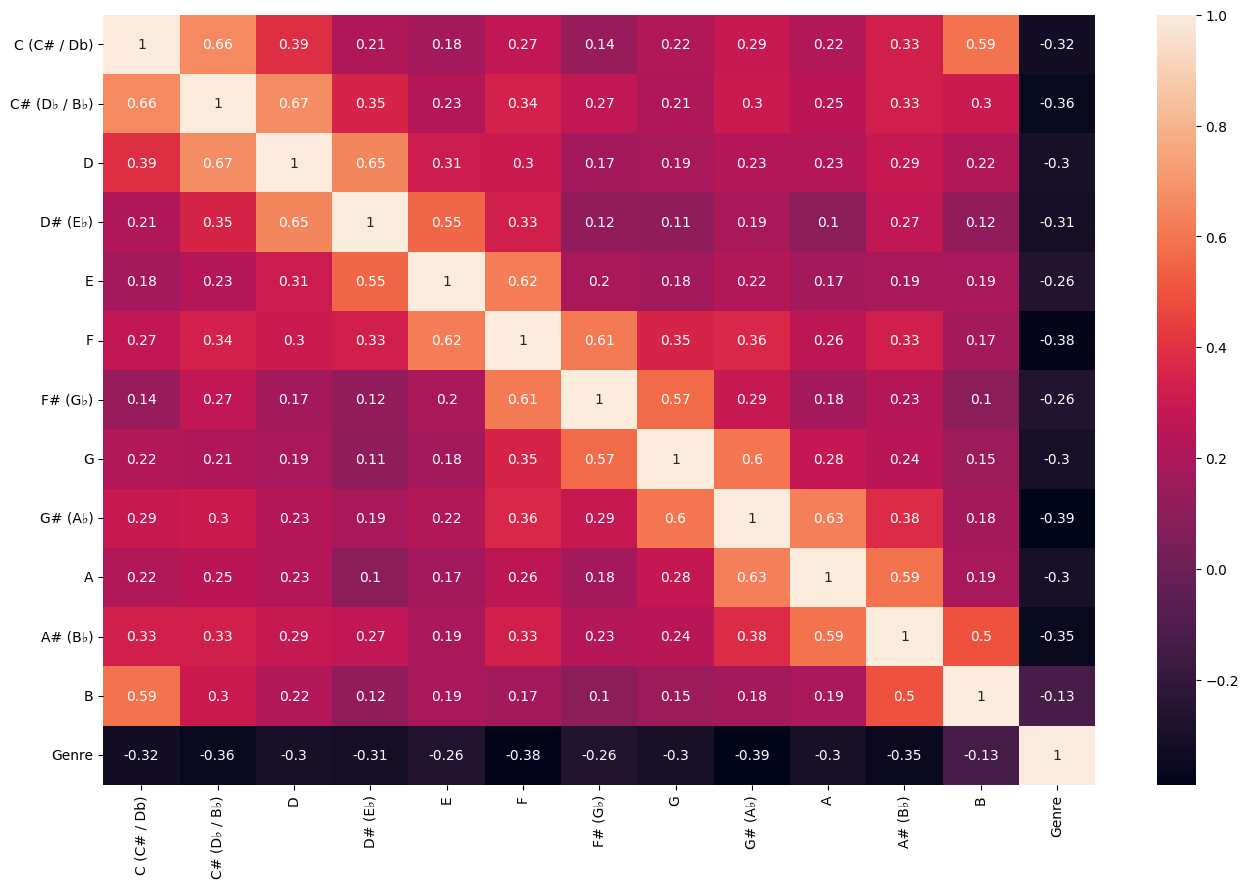

In [16]:
corr_mat = round(chroma_final.corr(),2)
plt.figure(figsize=(16,10))
sns.heatmap(corr_mat, annot = True)
plt.show()

### Training and testing set created

In [17]:
x = chroma_final.iloc[:,:12]
y = chroma_final.iloc[:,12:]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

### ML algorithms

In [18]:
svm_clf = SVC(random_state=42)
svm_clf.fit(x_train, y_train)
cross_val_score(svm_clf, x_train, y_train, cv = 3, scoring='accuracy')

C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages

array([0.72003551, 0.71964092, 0.71944362])

##### Support Vector Machines yielded accuracy of about 72% 

In [19]:
dtc = DecisionTreeClassifier(max_depth=13)
dtc.fit(x_train, y_train)
cross_val_score(dtc, x_train, y_train, cv = 6, scoring='accuracy')

array([0.6543697 , 0.65318603, 0.66206352, 0.65134175, 0.65292028,
       0.64936859])

Decision Tree Classifier yielded accuracy of about 66%

In [20]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
cross_val_score(rf, x_train, y_train, cv = 3, scoring='accuracy')

C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-pa

array([0.76304627, 0.76127059, 0.76117194])

##### Random Forest Classifier yielded accuracy of about 76%

In [21]:
sgdc = SGDClassifier(random_state=42)
sgdc.fit(x_train, y_train)
cross_val_score(sgdc, x_train, y_train, cv = 6, scoring='accuracy')

C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages

array([0.57565595, 0.56875123, 0.5928191 , 0.56294396, 0.57162589,
       0.57932123])

##### SGDClassifier yielded accuracy of about 57%

In [22]:
dtr_r = DecisionTreeRegressor(max_depth=9)
dtr_r.fit(x_train, y_train)
y_pred = dtr_r.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
train_score = dtr_r.score(x_train, y_train)
print(train_score)
test_score = dtr_r.score(x_test, y_test)
print(test_score)


1.0288520870648126
0.5240587455699605
0.387566490261011


C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### Decision Tree Regressor yielded RMSE of 1.02 with training and testing R2 scores of 0.52 and 0.39 respectively

In [23]:
rf_r = RandomForestRegressor()
rf_r.fit(x_train, y_train)
y_pred_rf = rf_r.predict(x_test)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
print(rmse)
train_score = rf_r.score(x_train, y_train)
print(train_score)
test_score = rf_r.score(x_test, y_test)
print(test_score)


C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.8449138313059797
0.9394982334562907
0.586973517394929


##### Random Forest Regressor yielded RMSE of 0.84 with training and testing R2 scores of 0.94 and 0.58 respectively

### Therefore best working model was RandomForestClassifier which was 76% accurate

# 2. For MFCCS

### Reading Data

In [25]:
mfccs = pd.read_csv(r'data\MFCCS.csv')
mfccs

,MFCCS2,MFCCS1,MFCCS3,MFCCS4,MFCCS5,MFCCS6,MFCCS7,MFCCS8,MFCCS9,MFCCS10,...,MFCCS12,MFCCS13,MFCCS14,MFCCS15,MFCCS16,MFCCS17,MFCCS18,MFCCS19,MFCCS20,Genre
0,-82.538379,-20.819182,-77.170377,-0.774806,-0.428822,0.112900,0.243659,0.043409,0.026348,0.323914,...,0.014450,-0.662169,-0.801049,-0.143696,0.667632,0.802994,0.196514,-0.429396,-0.461403,Pop
1,-44.548495,-37.130033,-30.029846,-2.074488,-19.638752,-11.780397,-0.884470,-11.835522,-9.107750,-4.343322,...,-12.907894,-21.889100,-16.121517,-5.964852,-2.290609,-3.014832,-17.339417,-8.531179,-11.185791,Pop
2,-36.122419,-38.565193,-5.675943,13.831146,-22.229180,-8.514397,-7.634006,-5.748925,-10.352011,-8.238277,...,-8.171220,-15.853426,-15.217999,-3.774666,-6.012738,-3.780430,-21.194672,-9.659815,-14.625695,Pop
3,-32.498149,-34.827164,-4.571852,24.558895,-17.288970,-12.130127,-12.954552,-6.830247,-9.157953,-10.039587,...,-9.289801,-12.998034,-11.540025,-3.927628,-7.778324,-5.322074,-16.421402,-6.785910,-13.096530,Pop
4,-32.170577,-29.357154,-11.709115,32.440964,-6.432176,-18.960820,-19.536228,-11.205974,0.906303,-6.905530,...,-13.754463,-18.625702,-5.513802,2.133564,-8.422679,-11.495544,-14.253121,-2.729089,-5.824730,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40544,-6.576997,51.216080,-18.051332,-10.933138,-22.801296,-7.709180,-4.270202,0.272344,-8.853046,8.138767,...,-1.749602,-22.044106,-9.742417,-7.142367,3.386284,-1.277248,0.558268,-11.457501,-9.283148,Funk
40545,-5.018637,34.431420,-18.806923,-8.952702,-15.589443,7.380170,13.821352,14.582947,-6.140523,6.407661,...,-15.272321,-22.283894,2.561876,10.069037,15.272973,4.709692,-4.708959,-18.386036,-14.492383,Funk
40546,4.212740,12.083229,-25.742655,-2.664504,-2.589310,14.486919,13.462833,13.860022,-10.082342,7.333518,...,-16.767010,-15.289425,17.369959,20.156519,10.860998,-6.656645,-12.298542,-16.698053,-12.718762,Funk
40547,9.265132,-3.521982,-42.557518,1.067693,10.085733,13.897348,12.329644,14.543528,-17.453018,7.976298,...,-13.056038,-3.717424,15.890601,17.256994,0.648106,-15.973786,-11.243152,-8.638395,-14.620360,Funk


In [26]:
mfccs.describe()

,MFCCS2,MFCCS1,MFCCS3,MFCCS4,MFCCS5,MFCCS6,MFCCS7,MFCCS8,MFCCS9,MFCCS10,MFCCS11,MFCCS12,MFCCS13,MFCCS14,MFCCS15,MFCCS16,MFCCS17,MFCCS18,MFCCS19,MFCCS20
count,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000
mean,-14.746120,-71.258024,9.108066,20.534116,3.257134,5.137274,-0.005894,4.296536,-2.888565,3.445650,-1.191338,0.855553,-2.865166,1.955821,-2.027844,3.351131,-2.275133,3.107530,-2.404446,1.659201
std,32.443327,104.483327,31.484772,19.178413,15.821206,15.280703,14.163945,14.076851,12.913832,12.305148,12.213666,11.004879,10.144736,10.226601,9.764007,9.696944,9.850037,9.760946,9.549578,9.730497
min,-100.000000,-540.998900,-134.000670,-67.884500,-79.933820,-69.795044,-68.260680,-49.822525,-65.185300,-43.752537,-48.665000,-45.680115,-46.023796,-43.284115,-55.053580,-37.318050,-40.337822,-37.753128,-46.302567,-43.689580
25%,-41.149850,-98.436500,-13.272567,8.369294,-6.343675,-4.246780,-8.963803,-4.774223,-10.808026,-4.568238,-8.961946,-5.966409,-9.198450,-4.565824,-7.981650,-2.729474,-8.557400,-2.688393,-8.341818,-4.402695
50%,-20.790574,-32.852158,12.468311,20.794619,3.270250,5.568259,0.000000,4.298647,-2.518362,3.760415,-1.547187,1.344340,-2.415541,2.168094,-1.662744,3.256405,-2.067913,2.881297,-2.460930,1.321129
75%,13.065827,-7.451777,30.724748,32.998360,13.582090,14.996903,8.759655,13.354823,5.202434,11.725515,6.422323,8.233647,3.830892,8.642021,4.260211,9.211194,4.018846,8.592693,3.177507,7.470307
max,80.000000,102.901110,117.702610,117.398970,73.599890,59.296432,62.277195,55.073730,56.575530,65.256836,55.987392,49.940110,54.503480,56.032700,40.241226,63.641777,49.874400,65.935425,51.713066,50.336760


### Getting target column ready

In [27]:
arr = []
for i in range(len(mfccs['Genre'])):
    if mfccs['Genre'][i]=='Funk':
        arr.append(1)
    elif mfccs['Genre'][i]=='Rock':
        arr.append(2)
    elif mfccs['Genre'][i]=='Hip Hop':
        arr.append(3)
    elif mfccs['Genre'][i]=='Pop':
        arr.append(4)
    elif mfccs['Genre'][i]=='Jazz':
        arr.append(5)
    elif mfccs['Genre'][i]=='Romance':
        arr.append(6)

target_df = pd.DataFrame(arr, columns=['Genre'])
target_df

,Genre
0,4
1,4
2,4
3,4
4,4
...,...
40544,1
40545,1
40546,1
40547,1


In [28]:
mfccs.drop('Genre', axis = 1,inplace=True)

### Scaling is done to normalize the features, so that there is no biasing and outliers are also removed

In [29]:
ss = StandardScaler()
mfccs_scaled = ss.fit_transform(mfccs)
mfccs_scaled_df = pd.DataFrame(mfccs_scaled, columns = mfccs.columns)
mfccs_scaled_df

,MFCCS2,MFCCS1,MFCCS3,MFCCS4,MFCCS5,MFCCS6,MFCCS7,MFCCS8,MFCCS9,MFCCS10,MFCCS11,MFCCS12,MFCCS13,MFCCS14,MFCCS15,MFCCS16,MFCCS17,MFCCS18,MFCCS19,MFCCS20
0,-2.089585,0.482751,-2.740357,-1.111103,-0.232979,-0.328809,0.017619,-0.302140,0.225723,-0.253697,0.134815,-0.076431,0.217159,-0.269582,0.192971,-0.276740,0.312503,-0.298235,0.206823,-0.217936
1,-0.918609,0.326640,-1.243090,-1.178871,-1.447182,-1.107140,-0.062030,-1.146013,-0.481597,-0.632993,-1.091611,-1.250683,-1.875275,-1.767700,-0.403221,-0.581813,-0.075097,-2.094797,-0.641579,-1.320092
2,-0.658889,0.312904,-0.469566,-0.349510,-1.610916,-0.893404,-0.538565,-0.713624,-0.577949,-0.949527,-0.913600,-0.820262,-1.280311,-1.679349,-0.178906,-0.965664,-0.152823,-2.489769,-0.759767,-1.673614
3,-0.547177,0.348681,-0.434499,0.209862,-1.298659,-1.130027,-0.914210,-0.790441,-0.485484,-1.095916,-0.811233,-0.921907,-0.998842,-1.319697,-0.194573,-1.147742,-0.309337,-2.000746,-0.458818,-1.516460
4,-0.537080,0.401034,-0.661191,0.620854,-0.612433,-1.577047,-1.378894,-1.101290,0.293864,-0.841218,-1.039570,-1.327611,-1.553587,-0.730420,0.426204,-1.214192,-0.936090,-1.778605,-0.033996,-0.769131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40544,0.251800,1.172202,-0.862631,-1.640784,-1.647077,-0.840708,-0.301072,-0.285877,-0.461873,0.381399,0.523118,-0.236730,-1.890555,-1.143917,-0.523820,0.003625,0.101309,-0.261173,-0.948017,-1.124556
40545,0.299834,1.011556,-0.886630,-1.537519,-1.191237,0.146781,0.976240,0.730741,-0.251823,0.240716,-0.474377,-1.465538,-1.914192,0.059263,1.238941,1.229458,0.709125,-0.800802,-1.673559,-1.659913
40546,0.584376,0.797661,-1.106921,-1.209636,-0.369537,0.611867,0.950928,0.679385,-0.557067,0.315958,-1.019747,-1.601361,-1.224715,1.507278,2.272083,0.774467,-0.444827,-1.578357,-1.496797,-1.477637
40547,0.740107,0.648303,-1.640991,-1.015030,0.431616,0.573284,0.870922,0.727941,-1.127832,0.368196,-1.123032,-1.264145,-0.084011,1.362618,1.975119,-0.278754,-1.390738,-1.470232,-0.652806,-1.673066


### MFCCS data ready for ML pipeline

In [30]:
mfccs_final = pd.concat([mfccs_scaled_df,target_df], axis = 1)
mfccs_final

,MFCCS2,MFCCS1,MFCCS3,MFCCS4,MFCCS5,MFCCS6,MFCCS7,MFCCS8,MFCCS9,MFCCS10,...,MFCCS12,MFCCS13,MFCCS14,MFCCS15,MFCCS16,MFCCS17,MFCCS18,MFCCS19,MFCCS20,Genre
0,-2.089585,0.482751,-2.740357,-1.111103,-0.232979,-0.328809,0.017619,-0.302140,0.225723,-0.253697,...,-0.076431,0.217159,-0.269582,0.192971,-0.276740,0.312503,-0.298235,0.206823,-0.217936,4
1,-0.918609,0.326640,-1.243090,-1.178871,-1.447182,-1.107140,-0.062030,-1.146013,-0.481597,-0.632993,...,-1.250683,-1.875275,-1.767700,-0.403221,-0.581813,-0.075097,-2.094797,-0.641579,-1.320092,4
2,-0.658889,0.312904,-0.469566,-0.349510,-1.610916,-0.893404,-0.538565,-0.713624,-0.577949,-0.949527,...,-0.820262,-1.280311,-1.679349,-0.178906,-0.965664,-0.152823,-2.489769,-0.759767,-1.673614,4
3,-0.547177,0.348681,-0.434499,0.209862,-1.298659,-1.130027,-0.914210,-0.790441,-0.485484,-1.095916,...,-0.921907,-0.998842,-1.319697,-0.194573,-1.147742,-0.309337,-2.000746,-0.458818,-1.516460,4
4,-0.537080,0.401034,-0.661191,0.620854,-0.612433,-1.577047,-1.378894,-1.101290,0.293864,-0.841218,...,-1.327611,-1.553587,-0.730420,0.426204,-1.214192,-0.936090,-1.778605,-0.033996,-0.769131,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40544,0.251800,1.172202,-0.862631,-1.640784,-1.647077,-0.840708,-0.301072,-0.285877,-0.461873,0.381399,...,-0.236730,-1.890555,-1.143917,-0.523820,0.003625,0.101309,-0.261173,-0.948017,-1.124556,1
40545,0.299834,1.011556,-0.886630,-1.537519,-1.191237,0.146781,0.976240,0.730741,-0.251823,0.240716,...,-1.465538,-1.914192,0.059263,1.238941,1.229458,0.709125,-0.800802,-1.673559,-1.659913,1
40546,0.584376,0.797661,-1.106921,-1.209636,-0.369537,0.611867,0.950928,0.679385,-0.557067,0.315958,...,-1.601361,-1.224715,1.507278,2.272083,0.774467,-0.444827,-1.578357,-1.496797,-1.477637,1
40547,0.740107,0.648303,-1.640991,-1.015030,0.431616,0.573284,0.870922,0.727941,-1.127832,0.368196,...,-1.264145,-0.084011,1.362618,1.975119,-0.278754,-1.390738,-1.470232,-0.652806,-1.673066,1


### Training and testing set ready

In [31]:
x = mfccs_final.iloc[:,:20]
y = mfccs_final.iloc[:,20:]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [33]:
svm_clf = SVC(random_state=42)
svm_clf.fit(x_train, y_train)
cross_val_score(svm_clf, x_train, y_train, cv = 3, scoring='accuracy')

C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages

array([0.96458518, 0.96300681, 0.96744599])

##### Support Vector Machines yielded accuracy of about 96% 

In [34]:
dtc = DecisionTreeClassifier(max_depth=13)
dtc.fit(x_train, y_train)
cross_val_score(dtc, x_train, y_train, cv = 6, scoring='accuracy')

array([0.8865654 , 0.87630696, 0.88676268, 0.87509866, 0.87371744,
       0.88121547])

Decision Tree Classifier yielded accuracy of about 88%

In [35]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
cross_val_score(rf, x_train, y_train, cv = 3, scoring='accuracy')

C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-pa

array([0.94811088, 0.94978791, 0.94860412])

##### Random Forest Classifier yielded accuracy of about 95%

In [36]:
sgdc = SGDClassifier(random_state=42)
sgdc.fit(x_train, y_train)
cross_val_score(sgdc, x_train, y_train, cv = 6, scoring='accuracy')

C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages

array([0.80469521, 0.79601499, 0.80449793, 0.78847672, 0.78374112,
       0.78847672])

##### SGDClassifier yielded accuracy of about 79%

In [37]:
dtr_r = DecisionTreeRegressor(max_depth=9)
dtr_r.fit(x_train, y_train)
y_pred = dtr_r.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
train_score = dtr_r.score(x_train, y_train)
print(train_score)
test_score = dtr_r.score(x_test, y_test)
print(test_score)


0.8367749980602983
0.7055323123293973
0.5948923442901358


C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### Decision Tree Regressor yielded RMSE of 0.83 with training and testing R2 scores of 0.7 and 0.59 respectively

In [38]:
rf_r = RandomForestRegressor()
rf_r.fit(x_train, y_train)
y_pred_rf = rf_r.predict(x_test)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
print(rmse)
train_score = rf_r.score(x_train, y_train)
print(train_score)
test_score = rf_r.score(x_test, y_test)
print(test_score)


C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.5687142295793388
0.97307341199259
0.8128709343971035


##### Decision Tree Regressor yielded RMSE of 0.56 with training and testing R2 scores of 0.97 and 0.81 respectively

# 3. For RMS

In [ ]:
rms = pd.read_csv(r'data\rms.csv')
rms

In [ ]:
rms.describe()

In [ ]:
arr = []
for i in range(len(rms['Genre'])):
    if rms['Genre'][i]=='Funk':
        arr.append(1)
    elif rms['Genre'][i]=='Rock':
        arr.append(2)
    elif rms['Genre'][i]=='Hip Hop':
        arr.append(3)
    elif rms['Genre'][i]=='Pop':
        arr.append(4)
    elif rms['Genre'][i]=='Jazz':
        arr.append(5)
    elif rms['Genre'][i]=='Romance':
        arr.append(6)

target_df = pd.DataFrame(arr, columns=['Genre'])
target_df

In [ ]:
rms.drop('Genre', axis = 1, inplace = True)

In [ ]:
rms_final = pd.concat([rms, target_df], axis = 1)
rms_final

In [ ]:
x = rms_final['rms']
y = rms_final['Genre']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [ ]:
x_train_df = pd.DataFrame(x_train)
y_train_df = pd.DataFrame(y_train)
x_test_df = pd.DataFrame(x_test)
y_test_df = pd.DataFrame(y_test)


In [ ]:
svm_clf = SVC(random_state=42)
svm_clf.fit(x_train_df, y_train_df)
cross_val_score(svm_clf, x_train_df, y_train_df, cv = 3, scoring='accuracy')

##### Support Vector Machines yielded accuracy of about 48% 

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_df, y_train_df)
cross_val_score(rf, x_train_df, y_train_df, cv = 3, scoring='accuracy')

##### Random Forest Classifier yielded accuracy of about 35%

In [ ]:
dtr_r = DecisionTreeRegressor(max_depth=9)
dtr_r.fit(x_train_df, y_train_df)
y_pred = dtr_r.predict(x_test_df)
rmse = mean_squared_error(y_test_df, y_pred, squared=False)
print(rmse)
train_score = dtr_r.score(x_train_df, y_train_df)
print(train_score)
test_score = dtr_r.score(x_test_df, y_test_df)
print(test_score)


# We can see that out of all 3 features only MFCCS yielded best accuracy while classifying genres. 
# RMS performed really bad as the dataset consisted of only one feature, therefore it became extremely difficult for ML algorithms to detect underlying patterns hence resulting in poor performance.
# Hence, we will move forward with MFCCS only. 